# Project

In [17]:
import os
import zipfile
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

## kaggle download & unzip


In [11]:
zip_path = "data/dogs-vs-cats.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

os.remove(zip_path)

In [12]:
zip_path = "data/test1.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

zip_path = "data/train.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data')

In [13]:
os.remove("data/test1.zip")
os.remove("data/train.zip")

## Image grid

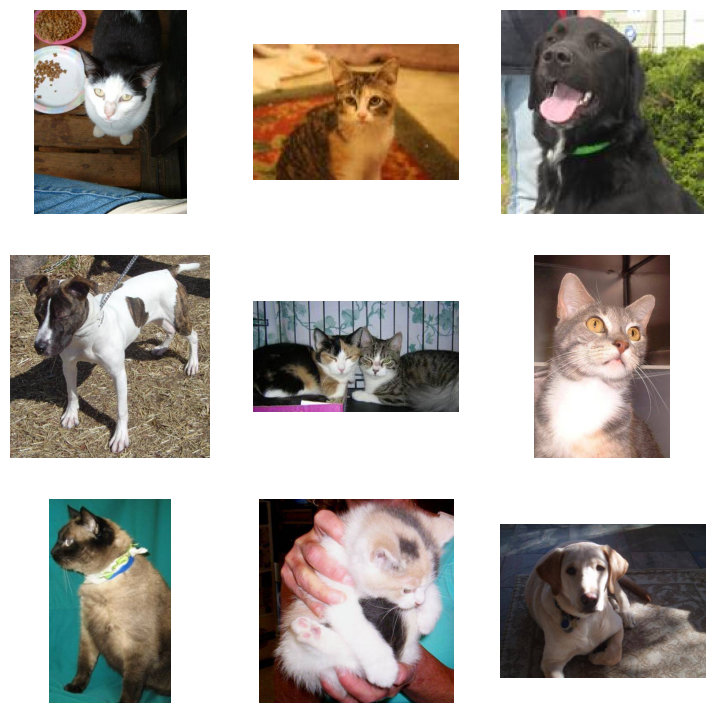

In [18]:
folder_path = "data/train/"

# Get a list of image file names in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

selected_images = []

for n in range (9):
    image = random.choice(image_files)
    selected_images.append(image)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

# Iterate through images and plot them on subplots
for i, ax in enumerate(axes.flat):
    # Open the image using Pillow (PIL)
    image_path = os.path.join(folder_path, selected_images[i])
    img = Image.open(image_path)
    
    # Display the image on the subplot
    ax.imshow(img)
    ax.axis('off')

# Show the plot
plt.show()

## Modelation

In [21]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
dataGenTrain = ImageDataGenerator()
data_train = dataGenTrain.flow_from_directory("./data/train", classes=["dog", "cat"], target_size=(200,200))

Found 25000 images belonging to 2 classes.


In [31]:
dataGenTest = ImageDataGenerator()
data_test = dataGenTest.flow_from_directory("./data", classes = ["test1"], target_size=(200,200))

Found 12500 images belonging to 1 classes.


## VGG16

In [34]:
# general imports
import keras
import numpy as np
import matplotlib.pyplot as plt

# keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.utils import to_categorical

import os

### Simpler version

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# taking the first row of the first slice of the volume and put it beside to the second row of the first slice, and so on 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])
              
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 196, 196, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 98, 98, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 96, 96, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 94, 94, 64)        36928     
                                                      

In [40]:
history = model.fit(data_train, epochs=3, validation_data=data_test)

Epoch 1/3


 39/782 [>.............................] - ETA: 41:09 - loss: 390157303808.0000 - accuracy: 0.5104

KeyboardInterrupt: 